In [1]:
!pip install pandas
!pip install streamlit

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
from PIL import Image

In [2]:
#
# Patch Streamlit pour fonctionner dans un environnement Jupyter
#StreamlitPatcher().jupyter()

#import streamlit as st
#from streamlit_jupyter import StreamlitPatcher, tqdm
#StreamlitPatcher().jupyter()

## I - OUVERTURE DU FICHIER DE DONNEES
## MISE EN DATAFRAME df 
## PRISE DE CONNAISSANCE

In [3]:
#lecture du fichier  fr-esr-insersup
csv_file = "fr-esr-insersup.csv"
df = pd.read_csv(csv_file,sep=';')

In [4]:
#analyse du fichier insertion_professionnelle_master_donnees
print(df.shape)

(45870, 31)


In [5]:
df.describe()

,Mois après la diplomation
count,45870.000000
mean,17.376978
std,8.246734
min,6.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,30.000000


In [6]:
df.columns

Index(['Diffusion des données', 'Région', 'Académie', 'Établissement',
       'Établissement actuel', 'Type de diplôme', 'Domaine disciplinaire',
       'Discipline', 'Secteur disciplinaire', 'Libellé du diplôme',
       'Source de données', 'Nombre de poursuivants', 'Nombre de sortants',
       'Année(s) d'obtention du diplôme prise(s) en compte',
       'Date d'insertion en emploi', 'Flag', 'Exception',
       'Taux d'emploi salarié en France', 'Taux d'insertion', 'Taux d'emploi',
       'Code de la région', 'Code de l'académie',
       'Identifiant interne de l'établissement',
       'Identifiant interne de l'établissement actuel',
       'Code UAI de l'établissement', 'type_diplome',
       'Code du domaine disciplinaire', 'Code de la discipline',
       'Code du secteur disciplinaire', 'Code du diplôme SISE',
       'Mois après la diplomation'],
      dtype='object')

## II - RECHERCHE CARACTERISTIQUES : colonnes, lignes et cellules 
## ASSORTIES DU NETTOYAGE 

In [7]:
# Identification des types colonnes non nulles et de leur type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45870 entries, 0 to 45869
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Diffusion des données                               45870 non-null  object
 1   Région                                              45840 non-null  object
 2   Académie                                            45840 non-null  object
 3   Établissement                                       45870 non-null  object
 4   Établissement actuel                                45870 non-null  object
 5   Type de diplôme                                     45870 non-null  object
 6   Domaine disciplinaire                               45870 non-null  object
 7   Discipline                                          45870 non-null  object
 8   Secteur disciplinaire                               45870 non-null  object
 9   Libell

In [8]:
#Convertir les colonnes objets en numérique, en remplaçant les valeurs non numériques par NaN
# Liste des colonnes à convertir en numeric
cols_to_convert = [
    "Nombre de poursuivants",
    "Nombre de sortants",
    "Taux d'emploi",
    "Taux d'emploi salarié en France",
    "Taux d'insertion",
    "Mois après la diplomation",
    "Code de la discipline"
]

# Conversion des colonnes en numérique, en remplaçant les valeurs non numériques par NaN
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Afficher le DataFrame résultant
print(df)

      Diffusion des données                      Région Académie  \
0                   2023_S2                         NaN      NaN   
1                   2023_S2                         NaN      NaN   
2                   2023_S2                         NaN      NaN   
3                   2023_S2                         NaN      NaN   
4                   2023_S2                         NaN      NaN   
...                     ...                         ...      ...   
45865               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45866               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45867               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45868               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45869               2023_S2  Provence-Alpes-Côte d'Azur     Nice   

                Établissement    Établissement actuel  \
0                    National                National   
1                    National                National   
2           

In [9]:
# Identifier les colonnes avec une seule valeur unique
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Afficher les colonnes supprimées et le DataFrame nettoyé
print(f"Colonnes à supprimer : {cols_to_drop}")
# Supprimer les colonnes avec une seule valeur unique


Colonnes à supprimer : ['Diffusion des données']


In [10]:
#suppression des colonnes n'ayant qu'une seule valeur 
#suppression de la colonne à valeur unique Diffusion des données pour laquelle la seule valeur est 2023 S2
df = df.drop(columns=["Diffusion des données"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45870 entries, 0 to 45869
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Région                                              45840 non-null  object 
 1   Académie                                            45840 non-null  object 
 2   Établissement                                       45870 non-null  object 
 3   Établissement actuel                                45870 non-null  object 
 4   Type de diplôme                                     45870 non-null  object 
 5   Domaine disciplinaire                               45870 non-null  object 
 6   Discipline                                          45870 non-null  object 
 7   Secteur disciplinaire                               45870 non-null  object 
 8   Libellé du diplôme                                  45870 non-null  object 


In [12]:
#Identifier toutes les valeurs nulles ou nan du dataframe
null_mask = df.isna() 

# Filtrer les lignes contenant des valeurs nulles, NaN 
df_with_nulls = df[null_mask.any(axis=1)]

# Afficher les lignes contenant des valeurs nulles, NaN 
print(df_with_nulls)

# chaque ligne du DF est bien concernée

                           Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45865  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45866  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45867  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45868  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45869  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1                    National              

In [27]:
# Identifier toutes les colonnes contenant des cellules avec 'nd' ou '-'
mask_nd_or_dash = df.apply(lambda col: col.map(lambda x: x == "nd" or x == "-"))
cols_with_nd_or_dash = mask_nd_or_dash.any(axis=0)

# Afficher les colonnes qui ont au moins une valeur 'nd' ou '-'
print("\nColonnes avec au moins une valeur 'nd' ou '-':")
print(cols_with_nd_or_dash[cols_with_nd_or_dash].index.tolist())


Colonnes avec au moins une valeur 'nd' ou '-':
[]


In [28]:
# Identifier toutes les valeurs 'nd' du dataframe
nd_mask = df.apply(lambda col: col.map(lambda x: x == 'nd'))

# Filtrer les lignes contenant des valeurs 'nd'
df_with_nd = df[nd_mask.any(axis=1)]

# Identifier les colonnes qui ont au moins une valeur 'nd'
cols_with_nd = nd_mask.any(axis=0)

# Afficher les lignes contenant des valeurs 'nd'
print("Lignes avec des valeurs 'nd':")
print(df_with_nd)

# Afficher les colonnes qui ont au moins une valeur 'nd'
print("\nColonnes avec au moins une valeur 'nd':")
print(cols_with_nd[cols_with_nd].index.tolist())

Lignes avec des valeurs 'nd':
Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 30 columns]

Colonnes avec au moins une valeur 'nd':
[]


In [29]:
#Identifier toutes les valeurs - du dataframe

tiret_mask = df.apply(lambda col: col.map(lambda x: x == '-'))


# Filtrer les lignes contenant des valeurs '-'
df_with_tiret = df[tiret_mask.any(axis=1)]

# Identifier les colonnes qui ont au moins une valeur 'nd'
cols_with_tiret = tiret_mask.any()

# Afficher les lignes contenant des valeurs nulles, NaN ou 'nd'
print("Lignes avec des tirets :")
print(df_with_tiret)

# Afficher les colonnes qui ont au moins une valeur 'nd'
print("\nColonnes avec au moins une valeur 'tiret':")
print(cols_with_tiret[cols_with_tiret].index.tolist())

Lignes avec des tirets :
Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 30 columns]

Colonnes avec au moins une valeur 'tiret':
[]


In [30]:
#Remplacer toutes les cellules égales = tiret ou nd par des Nan

df.replace(['-', 'nd'], np.nan, inplace=True)

# Afficher le DataFrame résultant
print(df)

                           Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45865  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45866  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45867  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45868  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45869  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1                    National              

In [22]:
#supprimer les lignes pour lesquelles les colonnes Taux d'emploi salarié en France, Taux d'emploi et Taux d'insertion" sont TOUTES nAN 

# Supprimer les lignes où "Taux d'emploi salarié en France", "Taux d'emploi" et "Taux d'insertion" sont toutes NaN
df = df.dropna(subset=["Taux d'emploi salarié en France", "Taux d'emploi", "Taux d'insertion"], how='all')

# Afficher le DataFrame résultant
print(df)

                           Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45852  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1                    National              

In [31]:
df.describe

<bound method NDFrame.describe of                            Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45865  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45866  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45867  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45868  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45869  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1        

In [32]:
df["Mois après la diplomation"].value_counts()

Mois après la diplomation
18    13716
6      9208
12     9208
30     9123
24     4615
Name: count, dtype: int64

In [33]:
df["Taux d'emploi salarié en France"].value_counts()

Taux d'emploi salarié en France
75.00    493
80.00    419
66.70    378
50.00    343
85.70    291
        ... 
93.45      1
85.12      1
78.32      1
83.97      1
70.67      1
Name: count, Length: 1682, dtype: int64

In [34]:
df["Taux d'emploi"].value_counts()

Taux d'emploi
100.00    374
90.00      14
85.71      12
90.91       9
95.87       9
         ... 
98.65       1
98.48       1
72.30       1
85.83       1
84.56       1
Name: count, Length: 1734, dtype: int64

In [35]:
df["Taux d'insertion"].value_counts()

Taux d'insertion
100.00    739
95.24      16
90.91      14
90.00      13
95.01      10
         ... 
81.50       1
64.80       1
90.95       1
98.42       1
84.56       1
Name: count, Length: 1458, dtype: int64

In [36]:
df["Année(s) d'obtention du diplôme prise(s) en compte"].value_counts()

Année(s) d'obtention du diplôme prise(s) en compte
2019,2020    19552
2020         12539
2020,2021     8376
2021          5403
Name: count, dtype: int64

In [37]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Région,NaN,NaN,NaN,NaN,NaN,Mayotte,La Réunion,La Réunion,La Réunion,La Réunion
Académie,NaN,NaN,NaN,NaN,NaN,Mayotte,La Réunion,La Réunion,La Réunion,La Réunion
Établissement,National,National,National,National,National,Université de Mayotte,Université de La Réunion,Université de La Réunion,Université de La Réunion,Université de La Réunion
Établissement actuel,National,National,National,National,National,Université de Mayotte,Université de La Réunion,Université de La Réunion,Université de La Réunion,Université de La Réunion
Type de diplôme,Licence professionnelle,Master LMD,Master MEEF,Master LMD,Master MEEF,Licence professionnelle,Master LMD,Master MEEF,Master MEEF,Master MEEF
Domaine disciplinaire,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,"Droit, économie, gestion",Tous domaines disciplinaires,Tous domaines disciplinaires,Sciences humaines et sociales,Sciences humaines et sociales
Discipline,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,"Sciences économiques, gestion",Toutes disciplines,Toutes disciplines,Sciences humaines et sociales,Sciences humaines et sociales
Secteur disciplinaire,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Sciences de gestion,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Sciences de l'éducation,Sciences de l'éducation
Libellé du diplôme,Toute licence professionnelle,Tout Master LMD,Tout Master MEEF,Tout Master LMD,Tout Master MEEF,MANAGEMENT ET GESTION DES ORGANISATIONS,Tout Master LMD,Tout Master MEEF,"METIERS DE L'ENSEIGNEMENT, DE L'EDUCATION ET D...","METIERS DE L'ENSEIGNEMENT, DE L'EDUCATION ET D..."
Source de données,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup


In [38]:
#identification et gestion des colonnes dupliquées

# Transposer le DataFrame pour travailler avec les colonnes comme des lignes
df_T = df.T

# Identifier les colonnes dupliquées
duplicate_columns = df_T.duplicated()

# Afficher les colonnes dupliquées
print("Colonnes dupliquées :")
print(duplicate_columns)

# Compter le nombre de colonnes dupliquées
num_duplicates = duplicate_columns.sum()
print(f"Nombre de colonnes dupliquées : {num_duplicates}")

#pas de colonne à supprimer

Colonnes dupliquées :
Région                                                False
Académie                                              False
Établissement                                         False
Établissement actuel                                  False
Type de diplôme                                       False
Domaine disciplinaire                                 False
Discipline                                            False
Secteur disciplinaire                                 False
Libellé du diplôme                                    False
Source de données                                     False
Nombre de poursuivants                                False
Nombre de sortants                                    False
Année(s) d'obtention du diplôme prise(s) en compte    False
Date d'insertion en emploi                            False
Flag                                                  False
Exception                                             False
Taux d'emploi sala

In [22]:
##gestion des colonnes redondantes et quasi dupliquées sur la base du head(ci-dessus)

# Comparaison des deux colonnes
#compared = df["Identifiant interne de l'établissement"] != df["Identifiant interne de l'établissement actuel"]

# Créer un DataFrame des résultats de la comparaison
#compared_df = pd.DataFrame(compared, columns=['Différences'])

# Ajouter les colonnes d'origine au DataFrame des différences pour contexte
#compared_df["Identifiant interne de l'établissement"] = df["Identifiant interne de l'établissement"]
#compared_df["Identifiant interne de l'établissement actuel"] = df["Identifiant interne de l'établissement actuel"]

# Filtrer les lignes où il y a des différences (True)
#differences_df = compared_df[compared_df['Différences']]

# Transposer le résultat pour voir tous les True renvoyés
#transposed_differences = differences_df.T

# Afficher les différences transposées
#print(transposed_differences)



In [39]:
df.tail()

,Région,Académie,Établissement,Établissement actuel,Type de diplôme,Domaine disciplinaire,Discipline,Secteur disciplinaire,Libellé du diplôme,Source de données,...,Code de l'académie,Identifiant interne de l'établissement,Identifiant interne de l'établissement actuel,Code UAI de l'établissement,type_diplome,Code du domaine disciplinaire,Code de la discipline,Code du secteur disciplinaire,Code du diplôme SISE,Mois après la diplomation
45865,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Licence professionnelle,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,METIERS DE L'INDUSTRIE : GESTION DE LA PRODUCT...,insersup,...,A23,s3t8T,s3t8T,0062205P,licence_pro,DEG,2.0,39,2400120,12
45866,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Licence professionnelle,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,METIERS DE L'INDUSTRIE : GESTION DE LA PRODUCT...,insersup,...,A23,s3t8T,s3t8T,0062205P,licence_pro,DEG,2.0,39,2400120,18
45867,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Licence professionnelle,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,METIERS DE L'INDUSTRIE : GESTION DE LA PRODUCT...,insersup,...,A23,s3t8T,s3t8T,0062205P,licence_pro,DEG,2.0,39,2400120,30
45868,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Licence professionnelle,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,METIERS DE L'IMMOBILIER : GESTION ET DEVELOPPE...,insersup,...,A23,s3t8T,s3t8T,0062205P,licence_pro,DEG,2.0,39,2400114,12
45869,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Licence professionnelle,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,METIERS DE L'IMMOBILIER : GESTION ET DEVELOPPE...,insersup,...,A23,s3t8T,s3t8T,0062205P,licence_pro,DEG,2.0,39,2400114,18


In [40]:
df["Code de la discipline"].value_counts()

Code de la discipline
2.0     10879
15.0    10361
6.0      8843
1.0      4851
9.0      3647
4.0      2055
10.0     1185
5.0       990
32.0      534
31.0      343
3.0       319
33.0      120
13.0       20
20.0       13
Name: count, dtype: int64

In [41]:
df["Région"].value_counts()

Région
Île-de-France                 8454
Auvergne-Rhône-Alpes          5731
Occitanie                     4444
Grand Est                     4111
Nouvelle-Aquitaine            4088
Hauts-de-France               3906
Provence-Alpes-Côte d'Azur    3009
Bretagne                      2696
Pays de la Loire              2565
Normandie                     2175
Bourgogne-Franche-Comté       1823
Centre-Val de Loire           1398
La Réunion                     480
Corse                          393
Guadeloupe                     386
Guyane                         157
Mayotte                         24
Name: count, dtype: int64

In [42]:
df["Académie"].value_counts()

Académie
Versailles          3064
Lille               3022
Lyon                2967
Paris               2785
Rennes              2696
Créteil             2605
Nantes              2565
Montpellier         2359
Bordeaux            2209
Normandie           2175
Toulouse            2085
Aix-Marseille       1821
Grenoble            1749
Strasbourg          1665
Nancy-Metz          1486
Orléans-Tours       1398
Poitiers            1212
Nice                1188
Clermont-Ferrand    1015
Reims                960
Dijon                917
Besançon             906
Amiens               884
Limoges              667
La Réunion           480
Corse                393
Guadeloupe           386
Guyane               157
Mayotte               24
Name: count, dtype: int64

In [38]:
print(df.dtypes)

Région                                                 object
Académie                                               object
Établissement                                          object
Établissement actuel                                   object
Type de diplôme                                        object
Domaine disciplinaire                                  object
Discipline                                             object
Secteur disciplinaire                                  object
Libellé du diplôme                                     object
Source de données                                      object
Nombre de poursuivants                                float64
Nombre de sortants                                    float64
Année(s) d'obtention du diplôme prise(s) en compte     object
Date d'insertion en emploi                             object
Flag                                                   object
Exception                                              object
Taux d'e

In [40]:
#identification des valeurs manquantes ou nulles 
print(df.isnull().values.any())
print(df.isnull().sum())

True
Région                                                   30
Académie                                                 30
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                 4921
Nombre de sortants                                     3603
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                  13931
Exception                                             13931
Taux d'emploi salarié en France    

In [29]:
# supprimer les lignes quand les 3 colonnes "Taux d'emploi", "Taux d'emploi salarié en France" et "Taux d'insertion" sont vides ou nd

# Remplacer les valeurs 'nd' par NaN pour faciliter le filtrage
df.replace('nd', np.nan, inplace=True)

# Supprimer les lignes où les trois colonnes ont des valeurs NaN simultanément
df = df.dropna(subset=["Taux d'emploi", "Taux d'emploi salarié en France", "Taux d'insertion"], how='all')

# Afficher le dataframe nettoyé
print(df)


                           Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45852  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45854  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45860  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1                    National              

In [41]:
# Calcul du nombre de valeurs distinctes pour chaque colonne
distinct_counts = df.nunique()

print(distinct_counts)

Région                                                  17
Académie                                                29
Établissement                                           69
Établissement actuel                                    69
Type de diplôme                                          3
Domaine disciplinaire                                    5
Discipline                                              14
Secteur disciplinaire                                   45
Libellé du diplôme                                     405
Source de données                                        2
Nombre de poursuivants                                 142
Nombre de sortants                                     430
Année(s) d'obtention du diplôme prise(s) en compte       4
Date d'insertion en emploi                               5
Flag                                                     1
Exception                                                1
Taux d'emploi salarié en France                       16

# conclusion de l'application de l'appel de nunique  

## colonne à supprimer et indication à remonter dans streamlit pour présentation liminaire de l'appli :   
'Diffusion de données
'Source de données

## arbiter le sort à donner sur les colonnes :
'etablissement et établissement actuel : supprimer la colonne établissement
Identifiant interne de l'établissement et Identifiant interne de l'établissement actuel     suprrimer le code qui va correspond à la colonne supprimée à la ligne du dessus
## étudier les colonnes qui ont le même nombre d'occurrences et de titres "quasi-similaires"
Domaine disciplinaire et code disciplinaire
Secteur disciplinaire et code du secteur disciplinaire 
région et code de la région 
code discipline et  discipline 19



In [42]:
df_filteredbis = df[
    df['Région'].isna() & 
    df['Académie'].isna() & 
    df['Code de la région'].isna() & 
    df["Code de l'académie"].isna()
]
df_filteredbis.T

,0,1,2,3,4,5603,5604,5605,11249,11250,...,33342,33343,35111,35112,42549,42550,42551,44123,44124,44125
Région,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Académie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Établissement,National,National,National,National,National,National,National,National,National,National,...,National,National,National,National,National,National,National,National,National,National
Établissement actuel,National,National,National,National,National,National,National,National,National,National,...,National,National,National,National,National,National,National,National,National,National
Type de diplôme,Licence professionnelle,Master LMD,Master MEEF,Master LMD,Master MEEF,Licence professionnelle,Licence professionnelle,Master LMD,Master LMD,Master LMD,...,Licence professionnelle,Master LMD,Master LMD,Master MEEF,Licence professionnelle,Master MEEF,Master LMD,Licence professionnelle,Master MEEF,Master MEEF
Domaine disciplinaire,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,...,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires
Discipline,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,...,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines
Secteur disciplinaire,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,...,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires
Libellé du diplôme,Toute licence professionnelle,Tout Master LMD,Tout Master MEEF,Tout Master LMD,Tout Master MEEF,Toute licence professionnelle,Toute licence professionnelle,Tout Master LMD,Tout Master LMD,Tout Master LMD,...,Toute licence professionnelle,Tout Master LMD,Tout Master LMD,Tout Master MEEF,Toute licence professionnelle,Tout Master MEEF,Tout Master LMD,Toute licence professionnelle,Tout Master MEEF,Tout Master MEEF
Source de données,insersup,insersup,insersup,insersup,insersup,insersup,insersup,IP,insersup,insersup,...,insersup,insersup,insersup,IP,insersup,insersup,IP,insersup,insersup,insersup


In [43]:
df.drop(df_filteredbis.index, axis = 0)

,Région,Académie,Établissement,Établissement actuel,Type de diplôme,Domaine disciplinaire,Discipline,Secteur disciplinaire,Libellé du diplôme,Source de données,...,Code de l'académie,Identifiant interne de l'établissement,Identifiant interne de l'établissement actuel,Code UAI de l'établissement,type_diplome,Code du domaine disciplinaire,Code de la discipline,Code du secteur disciplinaire,Code du diplôme SISE,Mois après la diplomation
5,Mayotte,Mayotte,Université de Mayotte,Université de Mayotte,Licence professionnelle,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,MANAGEMENT ET GESTION DES ORGANISATIONS,insersup,...,A43,pVJpw,pVJpw,9760358K,licence_pro,DEG,2.0,39,2400074,30
6,La Réunion,La Réunion,Université de La Réunion,Université de La Réunion,Master LMD,Tous domaines disciplinaires,Toutes disciplines,Tous secteurs disciplinaires,Tout Master LMD,insersup,...,A28,cEt92,cEt92,9740478B,master_LMD,all,NaN,all,all,6
7,La Réunion,La Réunion,Université de La Réunion,Université de La Réunion,Master MEEF,Tous domaines disciplinaires,Toutes disciplines,Tous secteurs disciplinaires,Tout Master MEEF,insersup,...,A28,cEt92,cEt92,9740478B,master_MEEF,all,NaN,all,all,12
8,La Réunion,La Réunion,Université de La Réunion,Université de La Réunion,Master MEEF,Sciences humaines et sociales,Sciences humaines et sociales,Sciences de l'éducation,"METIERS DE L'ENSEIGNEMENT, DE L'EDUCATION ET D...",insersup,...,A28,cEt92,cEt92,9740478B,master_MEEF,SHS,6.0,34,2500249,6
9,La Réunion,La Réunion,Université de La Réunion,Université de La Réunion,Master MEEF,Sciences humaines et sociales,Sciences humaines et sociales,Sciences de l'éducation,"METIERS DE L'ENSEIGNEMENT, DE L'EDUCATION ET D...",insersup,...,A28,cEt92,cEt92,9740478B,master_MEEF,SHS,6.0,34,2500248,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45852,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,GESTION DES RESSOURCES HUMAINES,insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500034,24
45853,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,"MARKETING, VENTE",insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500023,18
45855,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,COMPTABILITE-CONTROLE-AUDIT,insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500020,12
45856,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,COMPTABILITE-CONTROLE-AUDIT,insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500020,24


In [37]:
# Supprimer les lignes de df_filteredbis du DataFrame original df
df = df.drop(df_filteredbis.index, axis = 0)

# Enregistrer df_filteredbis dans un fichier CSV nommé débouchés_globaux.csv
df_filteredbis.to_csv('débouchés_globaux.csv', index=False)

In [38]:
valeurs_distinctes = df['Domaine disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df['Code du domaine disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['Droit, économie, gestion' 'Tous domaines disciplinaires'
 'Sciences humaines et sociales' 'Sciences, technologies, santé'
 'Lettres, langues et arts']
Valeurs distinctes de la colonne : ['DEG' 'all' 'SHS' 'STS' 'LLA']


In [39]:
valeurs_distinctes = df['Secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df['Code du secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['Sciences de gestion' 'Tous secteurs disciplinaires'
 "Sciences de l'éducation" 'Aménagement' 'Sciences économiques'
 'Sciences de la vie, biologie, santé' 'Géographie'
 'Pluridisciplinaire droit, sciences économiques, AES' 'Génie civil'
 'Sciences juridiques' 'Pluridisciplinaire sciences' 'Informatique'
 "Sciences de l'univers, de la Terre, de l'espace, de la mer" 'Chimie'
 "Sciences de l'information et la communication"
 'Technologie et sciences industrielles' 'Sociologie, démographie'
 'Histoire' 'Sciences politiques'
 'Électronique, génie électrique, électronique - électrotechnique - automatique'
 'Pluridisciplinaire sciences humaines et sociales' 'Arts'
 'Psychologie, sciences cognitives'
 'Pluridisciplinaire lettres, langues, sciences humaines' 'STAPS'
 'Langues étrangères appliquées' 'Langues et littératures étrangères'
 'Sciences du langage, linguistique' 'Philosophie, épistémologie'
 'Archéologie, ethnologie, préhistoire, anthropologie'
 'Pl

In [40]:
valeurs_distinctes = df['Code de la région'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df['Région'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['R06' 'R04' 'R03' 'R01' 'R94' 'R11' 'R75' 'R93' 'R76' 'R32' 'R28' 'R24'
 'R52' 'R84' 'R53' 'R27' 'R44']
Valeurs distinctes de la colonne : ['Mayotte' 'La Réunion' 'Guyane' 'Guadeloupe' 'Corse' 'Île-de-France'
 'Nouvelle-Aquitaine' "Provence-Alpes-Côte d'Azur" 'Occitanie'
 'Hauts-de-France' 'Normandie' 'Centre-Val de Loire' 'Pays de la Loire'
 'Auvergne-Rhône-Alpes' 'Bretagne' 'Bourgogne-Franche-Comté' 'Grand Est']


In [41]:
valeurs_distinctes = df['Code de la discipline'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df['Discipline'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : [ 2. nan  6.  9. 31. 15.  1. 33.  4. 32. 10.  5.  3. 13.]
Valeurs distinctes de la colonne : ['Sciences économiques, gestion' 'Toutes disciplines'
 'Sciences humaines et sociales'
 "Sciences de la vie, de la terre et de l'univers"
 'Pluridisciplinaire droit, sciences économiques, AES'
 'Sciences fondamentales et applications' 'Droit, sciences politiques'
 'Pluridisciplinaire sciences' 'Lettres, sciences du langage, arts'
 'Pluridisciplinaire lettres, langues, sciences humaines' 'STAPS'
 'Langues' 'Administration économique et sociale' 'Pharmacie']


In [42]:
valeurs_distinctes = df['Académie'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df["Code de l'académie"].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['Mayotte' 'La Réunion' 'Guyane' 'Guadeloupe' 'Corse' 'Versailles'
 'Créteil' 'Limoges' 'Poitiers' 'Aix-Marseille' 'Nice' 'Toulouse' 'Amiens'
 'Normandie' 'Paris' 'Orléans-Tours' 'Nantes' 'Lyon' 'Grenoble' 'Rennes'
 'Montpellier' 'Bordeaux' 'Besançon' 'Dijon' 'Strasbourg'
 'Clermont-Ferrand' 'Lille' 'Nancy-Metz' 'Reims']
Valeurs distinctes de la colonne : ['A43' 'A28' 'A33' 'A32' 'A27' 'A25' 'A24' 'A22' 'A13' 'A02' 'A23' 'A16'
 'A20' 'A70' 'A01' 'A18' 'A17' 'A10' 'A08' 'A14' 'A11' 'A04' 'A03' 'A07'
 'A15' 'A06' 'A09' 'A12' 'A19']


In [43]:
# Parcourir chaque ligne et vérifier si les valeurs des colonnes sont différentes
nomination_fac = []
for index, row in df.iterrows():
    if row['Établissement'] != row['Établissement actuel'] and row['Établissement'] and row['Établissement actuel'] not in nomination_fac :
        nomination_fac += [row['Établissement'],row['Établissement actuel']]    
print(nomination_fac)


['Université Panthéon-Assas', 'Université Paris-Panthéon-Assas', 'Université de Nantes', 'Nantes Université', 'Université de Rennes 1', 'Université de Rennes']


In [44]:
# analyse des colonnes des universités : 3 universités uniquement on un détail NS dans l'analyse différant sur 3 établissements : on supprime la colonne etablissement actuel 
df = df.drop(columns=["Établissement actuel"])

#suppression des colonnes relatives au termer etablissement actuel : Identifiant interne de l'établissement actuel
df = df.drop(columns=["Identifiant interne de l'établissement actuel"])

In [68]:
# Identification des lignes qui sont renseignées à moins de la moitié des champs 

count_non_na = df.notna().sum(axis=1) # Calculer le nombre de champs renseignés par ligne
half_columns = df.shape[1] / 2 # Déterminer la moitié du nombre total de colonnes

## Identifier les lignes où moins de la moitié des champs sont renseignés
rows_less_than_half_filled = df[count_non_na < half_columns]

print("Lignes avec moins de la moitié des champs renseignés :")
print(rows_less_than_half_filled)


Lignes avec moins de la moitié des champs renseignés :
Empty DataFrame
Columns: [Région, Académie, Établissement, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 27 columns]


In [45]:
date_ancienne = df["Année(s) d'obtention du diplôme prise(s) en compte"].min()
date_recente = df["Année(s) d'obtention du diplôme prise(s) en compte"].max()
print(date_ancienne)
print(date_recente)

valeurs_distinctes = df["Année(s) d'obtention du diplôme prise(s) en compte"].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")


2019,2020
2021
Valeurs distinctes de la colonne : ['2019,2020' '2020' '2021' '2020,2021']


In [46]:
# Identifier les colonnes disposant d'au moins une valeur manquante :
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))


Nombre de poursuivants null rate: 18.58%
Nombre de sortants null rate: 13.67%
Flag null rate: 52.81%
Exception null rate: 52.81%
Taux d'emploi salarié en France null rate: 13.67%
Taux d'insertion null rate: 86.33%
Taux d'emploi null rate: 86.33%
Code de la discipline null rate: 6.18%


In [44]:
# Suppression des lignes ou les valeurs sont nulles sur la colonne "code de la région"
#df = df.dropna(subset=['Code de la région'])
#print(df)

In [47]:
# Traitement des colonnes 14  Flag (31903 valeurs) et 15  Exception (31903 valeurs) les renseignements sont correlés  valeurs de flags en étoile et indiquent  
# Compter les occurrences de la valeur '**' dans la colonne "Flag" ** = "moins de 20 sortants donc cumul de 2 promos mais impossible
occurrences = df['Flag'].value_counts().get('**', 0)
print(f"Nombre d'occurrences de la valeur '**' dans la colonne 'Flag' : {occurrences}")

# Compter les occurrences de la valeur '*' dans la colonne "Flag" * = "moins de 20 sortants donc cumul de 2 promos

occurrences = df['Flag'].value_counts().get('*', 0)
print(f"Nombre d'occurrences de la valeur '*' dans la colonne 'Flag' : {occurrences}")

Nombre d'occurrences de la valeur '**' dans la colonne 'Flag' : 0
Nombre d'occurrences de la valeur '*' dans la colonne 'Flag' : 12420


In [72]:
#colonnes à supprimer : Date d'insertion en emploi, toutes les colonnes contenant code 

# Identifier les colonnes dont le nom contient "Code" et la colonne "Date d'insertion en emploi"
cols_to_drop = df.filter(like='Code').columns.tolist()
cols_to_drop.append("Date d'insertion en emploi")

# Supprimer les colonnes identifiées
df = df.drop(columns=cols_to_drop)

# Afficher le DataFrame nettoyé
df.shape

KeyError: '["Date d\'insertion en emploi"] not found in axis'

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26321 entries, 5 to 45861
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Région                                              26321 non-null  object 
 1   Académie                                            26321 non-null  object 
 2   Établissement                                       26321 non-null  object 
 3   Type de diplôme                                     26321 non-null  object 
 4   Domaine disciplinaire                               26321 non-null  object 
 5   Discipline                                          26321 non-null  object 
 6   Secteur disciplinaire                               26321 non-null  object 
 7   Libellé du diplôme                                  26321 non-null  object 
 8   Source de données                                   26321 non-null  object 
 9   

In [74]:
# Filtrer les lignes où la colonne "Académie" est "Mayotte"
df_mayotte = df.loc[df['Académie'] == 'Mayotte']

# Imprimer le sous-DataFrame
print(df_mayotte)


        Région Académie          Établissement          Type de diplôme  \
5      Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
5606   Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
5607   Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
13867  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
24002  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
25769  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
33208  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
33209  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
33210  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
34782  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
41126  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   

              Domaine disciplinaire                     Discipline  \
5          Droit, économie, g

In [75]:
df_mayotte.shape

(11, 19)

In [76]:
#analyse site université Mayotte et diplmoes dispensés : licences pro donc les lignes avec taux d'emploi salarié en France, taux d'insertion et taux d'emploi
#sont Nan correspondent aux lignes avec code discipline = all et nombre e poursuivants = nan : ON SUPPRIME

# Supprimer les lignes où "Taux d'insertion","Taux d'emploi salarié en France"  et "Taux d'emploi" sont NaN
df_mayotte_cleaned = df_mayotte.dropna(subset=["Taux d'insertion", "Taux d'emploi salarié en France","Taux d'emploi"])

# Mettre à jour le DataFrame d'origine en supprimant les lignes non désirées
df = pd.concat([df.loc[df['Académie'] != 'Mayotte'], df_mayotte_cleaned])

# Imprimer le DataFrame mis à jour
print(df)


                           Région    Académie             Établissement  \
6                      La Réunion  La Réunion  Université de La Réunion   
7                      La Réunion  La Réunion  Université de La Réunion   
8                      La Réunion  La Réunion  Université de La Réunion   
9                      La Réunion  La Réunion  Université de La Réunion   
10                     La Réunion  La Réunion  Université de La Réunion   
...                           ...         ...                       ...   
45852  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
45854  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
45860  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   

               Type de diplôme          Domaine disciplinaire  \
6                   Master LMD   T

In [77]:
df_mayotte.head(10).T

,5,5606,5607,13867,24002,25769,33208,33209,33210,34782
Région,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte
Académie,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte
Établissement,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte
Type de diplôme,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle
Domaine disciplinaire,"Droit, économie, gestion","Droit, économie, gestion","Droit, économie, gestion","Droit, économie, gestion","Droit, économie, gestion",Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,"Droit, économie, gestion","Droit, économie, gestion"
Discipline,"Sciences économiques, gestion","Sciences économiques, gestion","Sciences économiques, gestion","Sciences économiques, gestion","Sciences économiques, gestion",Toutes disciplines,Toutes disciplines,Toutes disciplines,"Sciences économiques, gestion","Sciences économiques, gestion"
Secteur disciplinaire,Sciences de gestion,Sciences de gestion,Sciences de gestion,Sciences de gestion,Sciences de gestion,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Sciences de gestion,Sciences de gestion
Libellé du diplôme,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,Toute licence professionnelle,Toute licence professionnelle,Toute licence professionnelle,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS
Source de données,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup
Nombre de poursuivants,9.0,8.0,8.0,9.0,9.0,NaN,NaN,NaN,8.0,9.0


In [78]:
# Remplacer les valeurs dans la colonne Flag
#1 correpondra à des promotions de plus de 20, 2; des promotions de moins de 20 et résultats groupés sur 2 ans et 3 promotions de moins de 20 et non regroupables sur deux ans 

df['Flag'] = df['Flag'].replace({'': 1, '**': 3, '*': 2, "NaN" : 1})
df['Flag'] = df['Flag'].fillna(1)  
# Supprimer la colonne Exception
df = df.drop(columns=['Exception'])



KeyError: "['Exception'] not found in axis"

In [80]:
# Identifier les lignes où "Nombre de poursuivants" et "Nombre de sortants" sont vides ensemble
condition = df['Nombre de poursuivants'].isna() & df['Nombre de sortants'].isna()
df_empty_rows = df[condition]

# Afficher les lignes identifiées
print("Lignes où 'Nombre de poursuivants' et 'Nombre de sortants' sont vides ensemble:")
print(df_empty_rows)

Lignes où 'Nombre de poursuivants' et 'Nombre de sortants' sont vides ensemble:
                   Région    Académie  \
119            Guadeloupe  Guadeloupe   
192         Île-de-France  Versailles   
550         Île-de-France  Versailles   
617         Île-de-France  Versailles   
619         Île-de-France  Versailles   
...                   ...         ...   
43423     Hauts-de-France       Lille   
43434     Hauts-de-France       Lille   
43437     Hauts-de-France       Lille   
44914  Nouvelle-Aquitaine    Bordeaux   
45494  Nouvelle-Aquitaine    Poitiers   

                                  Établissement          Type de diplôme  \
119                     Université des Antilles  Licence professionnelle   
192                   CY Cergy Paris Université               Master LMD   
550                     Université Paris-Saclay               Master LMD   
617             Université d'Évry-Val-d'Essonne               Master LMD   
619             Université d'Évry-Val-d'Essonne

In [81]:
#enregistrer le dataframe dans un csv   esr_intersup_nettoye
# Enregistrer le DataFrame nettoyé dans un fichier CSV
df.to_csv('esr_intersup_nettoye.csv', index=False)

# Afficher le DataFrame nettoyé pour vérification
print("DataFrame nettoyé:")
print(df.shape)



DataFrame nettoyé:
(26310, 19)


In [53]:
# Filtrer les lignes où la colonne "Académie" est NaN ou None
df_academie_na = df[df['Académie'].isna()]

# Afficher le DataFrame filtré
print(df_academie_na)

Empty DataFrame
Columns: [Région, Académie, Établissement, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 27 columns]


### VISUALISATION 

Statistiques descriptives du taux d'emploi par académie:
                  count       mean        std    min      25%     50%  \
Académie                                                                
Aix-Marseille     144.0  86.228611   9.046213  50.00  81.9450  87.665   
Amiens             73.0  90.695068   7.736741  67.00  85.3600  93.270   
Besançon           53.0  88.446792  10.230364  57.60  86.7200  92.080   
Bordeaux          236.0  88.276864   9.178055  53.33  83.9325  90.055   
Clermont-Ferrand  108.0  91.396019   7.359173  61.92  87.6925  92.480   
Corse              18.0  86.728889  10.874573  56.98  83.2800  90.025   
Créteil            80.0  86.389125   9.290186  56.31  82.9075  88.250   
Dijon              48.0  90.465417   7.783076  70.19  85.3925  90.890   
Grenoble          177.0  87.758475  10.021546  48.44  82.9100  89.880   
Guadeloupe         16.0  87.425625   6.995602  70.68  82.7950  88.330   
Guyane              4.0  94.937500   2.546584  92.20  93.0850  95.0

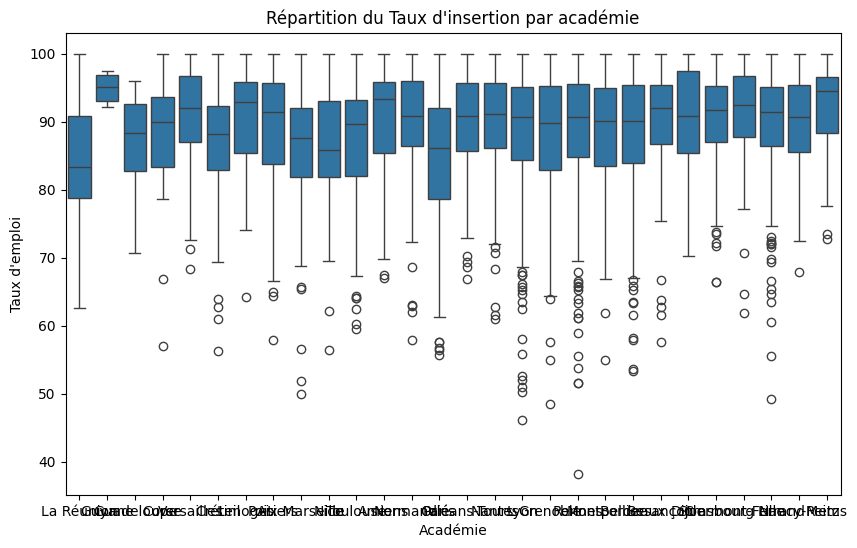

Moyenne et écart-type par académie:
                       mean        std
Académie                              
Aix-Marseille     86.228611   9.046213
Amiens            90.695068   7.736741
Besançon          88.446792  10.230364
Bordeaux          88.276864   9.178055
Clermont-Ferrand  91.396019   7.359173
Corse             86.728889  10.874573
Créteil           86.389125   9.290186
Dijon             90.465417   7.783076
Grenoble          87.758475  10.021546
Guadeloupe        87.425625   6.995602
Guyane            94.937500   2.546584
La Réunion        84.593529   9.101989
Lille             89.572029   8.183151
Limoges           90.617170   7.486006
Lyon              88.293237   9.831142
Montpellier       88.152663   9.083234
Nancy-Metz        90.027671   7.064582
Nantes            89.692767   8.536496
Nice              86.138452   8.606930
Normandie         90.071806   8.351070
Orléans-Tours     89.855086   7.508771
Paris             84.514615  10.162956
Poitiers          88.721810 

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["Taux d'emploi"].describe()
print("Statistiques descriptives du taux d'emploi par académie:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'emploi", data=df)
plt.title("Répartition du Taux d'insertion par académie")
plt.xlabel('Académie')
plt.ylabel("Taux d'emploi")
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'emploi"].agg(['mean', 'std'])
print("Moyenne et écart-type par académie:")
print(mean_std)


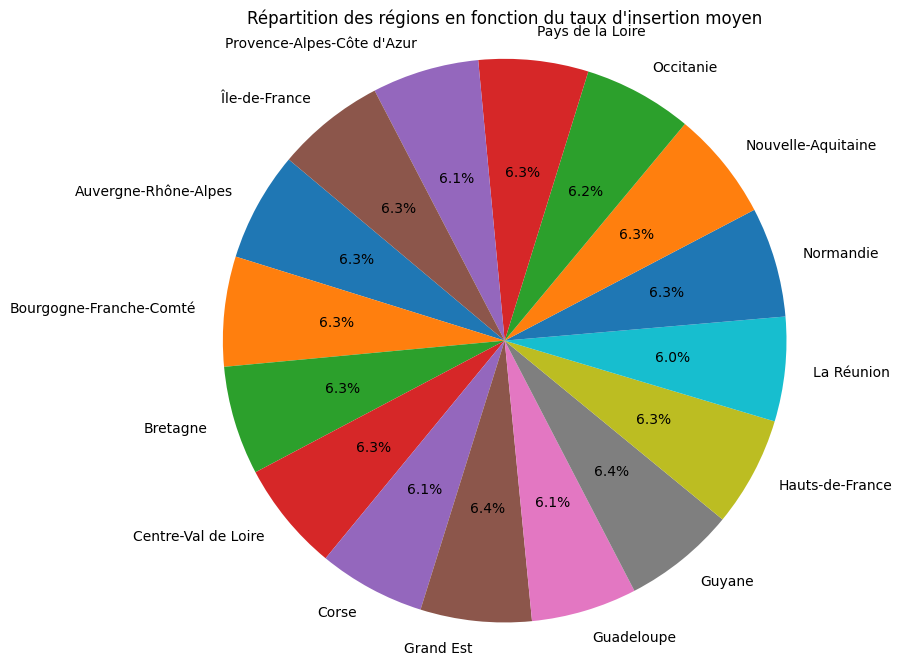

In [88]:

# Calculer la moyenne et l'écart-type par région
mean_std = df.groupby('Région')["Taux d'insertion"].agg(['mean', 'std'])

# Vérifier si le DataFrame mean_std n'est pas vide
if not mean_std.empty:
    # Afficher les statistiques
    #print("Moyenne et écart-type par académie:")
    #print(mean_std)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(8, 8))
    plt.pie(mean_std['mean'], labels=mean_std.index, autopct='%1.1f%%', startangle=140)
    plt.title('Répartition des régions en fonction du taux d\'insertion moyen')
    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame mean_std est vide, veuillez vérifier les données d'entrée.")


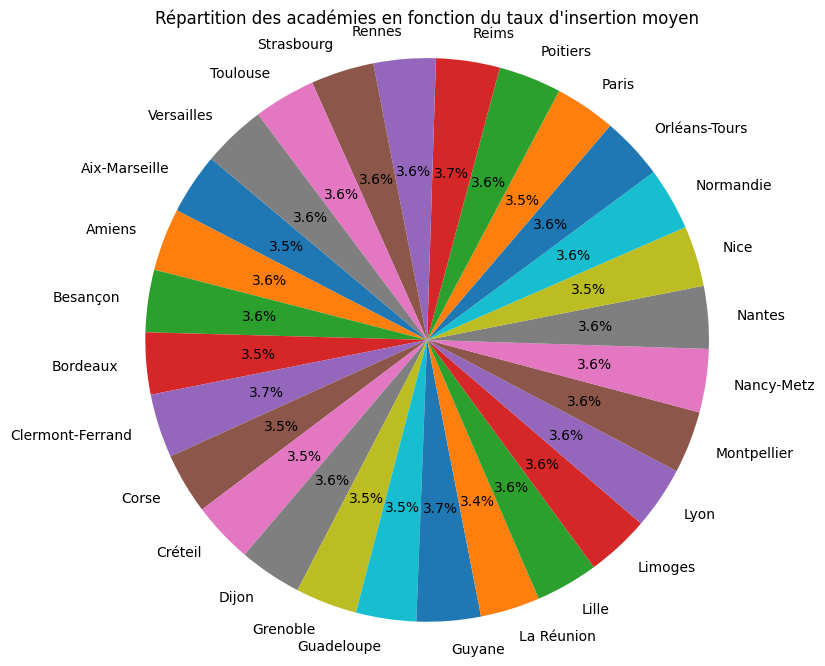

In [85]:

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'insertion"].agg(['mean', 'std'])

# Vérifier si le DataFrame mean_std n'est pas vide
if not mean_std.empty:
    # Afficher les statistiques
    #print("Moyenne et écart-type par académie:")
    #print(mean_std)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(8, 8))
    plt.pie(mean_std['mean'], labels=mean_std.index, autopct='%1.1f%%', startangle=140)
    plt.title('Répartition des académies en fonction du taux d\'insertion moyen')
    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame mean_std est vide, veuillez vérifier les données d'entrée.")


Top 10 académies par moyenne du taux d'insertion:
                       mean       std
Académie                             
Guyane            94.937500  2.546584
Clermont-Ferrand  94.643148  5.911810
Reims             94.511774  6.188020
Versailles        94.150745  5.422291
Nancy-Metz        93.825479  5.218223
Limoges           93.801132  6.339850
Strasbourg        93.608966  5.818198
Dijon             93.108542  6.256443
Poitiers          93.068879  6.855251
Normandie         93.025347  6.691557


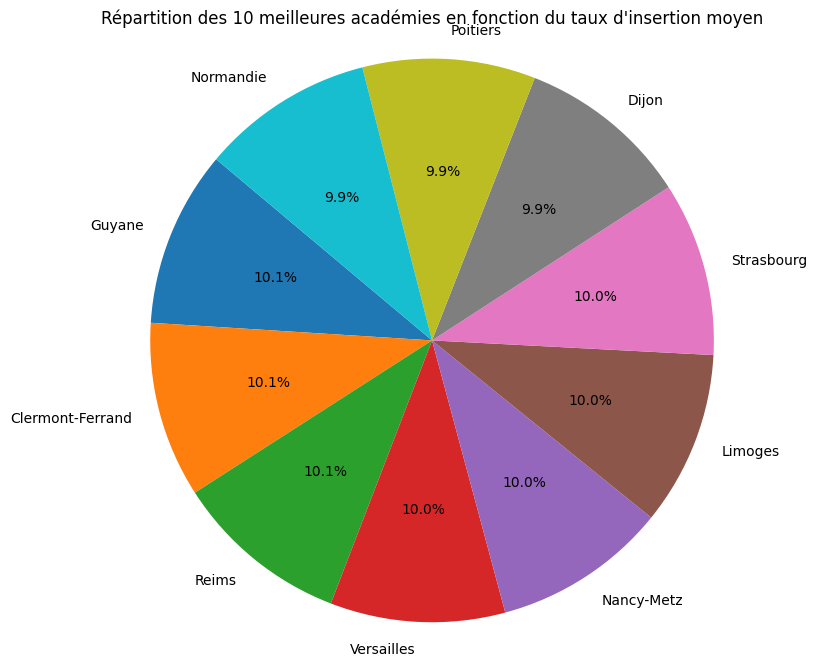

le taux d'insertion mpyen se dafinit comme xxxxxxxx


In [87]:
#affiner par un effet loupe en n'affichant que les 10 meilleures académies :

# Filtrer pour exclure l'académie de "Mayotte"
df_filtered = df[df['Académie'] != 'Mayotte']

# Calculer la moyenne et l'écart-type par académie pour les académies restantes
mean_std = df_filtered.groupby('Académie')['Taux d\'insertion'].agg(['mean', 'std'])

# Trier par la moyenne dans l'ordre décroissant et sélectionner les 10 premières académies
top_10_academies = mean_std.sort_values(by='mean', ascending=False).head(10)

# Vérifier si le DataFrame top_10_academies n'est pas vide
if not top_10_academies.empty:
    # Afficher les statistiques
    print("Top 10 académies par moyenne du taux d'insertion:")
    print(top_10_academies)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(8, 8))
    plt.pie(top_10_academies['mean'], labels=top_10_academies.index, autopct='%1.1f%%', startangle=140)
    plt.title('Répartition des 10 meilleures académies en fonction du taux d\'insertion moyen')
    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame top_10_academies est vide, veuillez vérifier les données d'entrée.")
print("le taux d'insertion moyen se définit comme xxxxxxxx")

Statistiques descriptives par académie:
                  count       mean        std    min      25%     50%  \
Académie                                                                
Aix-Marseille     144.0  90.701250   7.856541  58.82  87.1675  92.530   
Amiens             73.0  92.738356   6.694049  69.84  88.6600  95.170   
Besançon           53.0  92.508491   8.586965  57.60  90.6900  95.220   
Bordeaux          236.0  91.680254   7.505546  63.88  88.1275  93.305   
Clermont-Ferrand  108.0  94.643148   5.911810  64.73  91.9675  95.875   
Corse              18.0  90.304444  10.436650  56.98  87.9350  92.055   
Créteil            80.0  90.815750   7.937268  66.56  88.2500  92.000   
Dijon              48.0  93.108542   6.256443  75.74  87.6075  94.035   
Grenoble          177.0  91.458983   8.517495  58.96  87.3600  94.010   
Guadeloupe         16.0  89.331250   6.808496  71.33  85.8200  90.595   
Guyane              4.0  94.937500   2.546584  92.20  93.0850  95.035   
La Réunion 

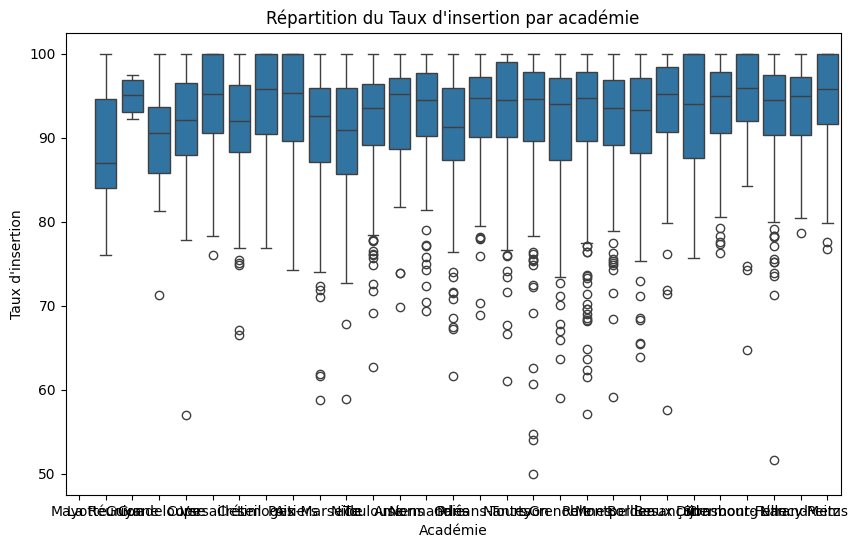

Moyenne et écart-type par académie:
                       mean        std
Académie                              
Aix-Marseille     90.701250   7.856541
Amiens            92.738356   6.694049
Besançon          92.508491   8.586965
Bordeaux          91.680254   7.505546
Clermont-Ferrand  94.643148   5.911810
Corse             90.304444  10.436650
Créteil           90.815750   7.937268
Dijon             93.108542   6.256443
Grenoble          91.458983   8.517495
Guadeloupe        89.331250   6.808496
Guyane            94.937500   2.546584
La Réunion        88.238824   6.597042
Lille             93.009529   6.574540
Limoges           93.801132   6.339850
Lyon              92.637051   7.746701
Mayotte                 NaN        NaN
Montpellier       92.110272   7.096901
Nancy-Metz        93.825479   5.218223
Nantes            92.681384   7.400898
Nice              89.791905   7.822569
Normandie         93.025347   6.691557
Orléans-Tours     92.874138   6.738381
Paris             90.266410 

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["Taux d'insertion"].describe()
print("Statistiques descriptives par académie:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'insertion", data=df)
plt.title("Répartition du Taux d'insertion par académie")
plt.xlabel('Académie')
plt.ylabel('Taux d\'insertion')
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'insertion"].agg(['mean', 'std'])
print("Moyenne et écart-type par académie:")
print(mean_std)


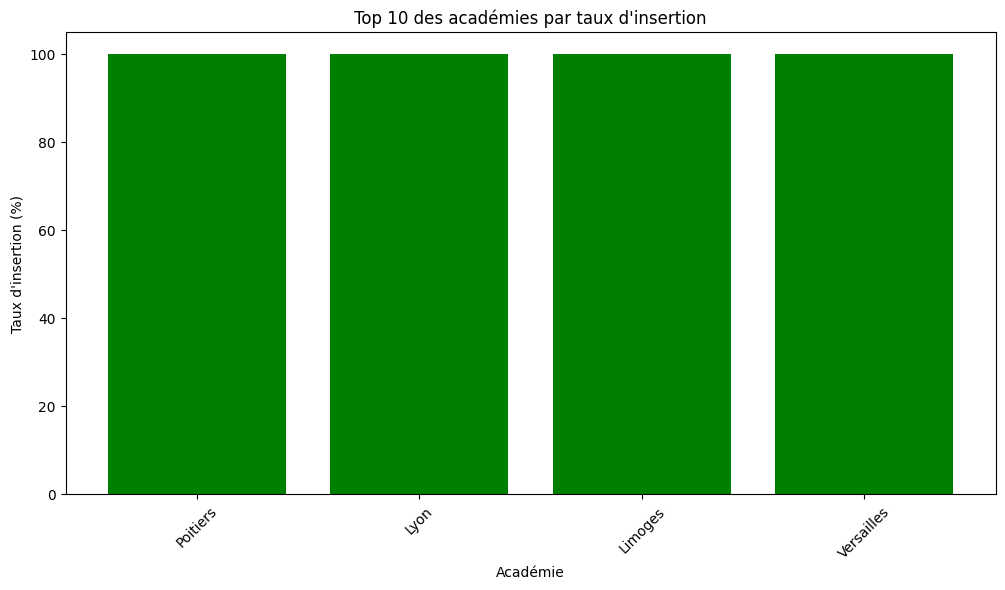

In [56]:

# Trier le dataframe par 'Taux d\'insertion' en ordre décroissant
df_sorted = df.sort_values(by='Taux d\'insertion', ascending=False)

# Sélectionner les 10 premières académies
top_10 = df_sorted.head(10)

# Afficher le dataframe trié
#print(top_10)

# Créer un histogramme des 10 meilleures académies
plt.figure(figsize=(12, 6))
plt.bar(top_10['Académie'], top_10['Taux d\'insertion'], color='green')
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Top 10 des académies par taux d'insertion")
plt.xticks(rotation=45)
plt.show()


In [54]:
# Exemple de création de dataframe
# Trier le dataframe par 'Taux d'insertion' en ordre décroissant
df_sorted = df.sort_values(by="Taux d'insertion", ascending=False)

# Afficher le dataframe trié
print(df_sorted)

# Créer un histogramme des meilleures académies
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Académie'], df_sorted["Taux d'insertion"], color='green')
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Meilleures académies par taux d'insertion")
plt.xticks(rotation=45)
plt.show()


                           Région  Académie  \
45494          Nouvelle-Aquitaine  Poitiers   
15513        Auvergne-Rhône-Alpes      Lyon   
15343        Auvergne-Rhône-Alpes      Lyon   
33833          Nouvelle-Aquitaine   Limoges   
33819          Nouvelle-Aquitaine   Limoges   
...                           ...       ...   
45852  Provence-Alpes-Côte d'Azur      Nice   
45853  Provence-Alpes-Côte d'Azur      Nice   
45854  Provence-Alpes-Côte d'Azur      Nice   
45860  Provence-Alpes-Côte d'Azur      Nice   
45861  Provence-Alpes-Côte d'Azur      Nice   

                            Établissement          Type de diplôme  \
45494              La Rochelle Université              Master MEEF   
15513  Université Claude Bernard - Lyon 1  Licence professionnelle   
15343         Université Lumière - Lyon 2               Master LMD   
33833               Université de Limoges               Master LMD   
33819               Université de Limoges               Master LMD   
...            

C:\Users\Sybille\AppData\Local\Temp\ipykernel_13060\3406279297.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [55]:
# Filtrer les lignes où "Source de données" est "IP"
df_ip = df.loc[df['Source de données'] == 'IP']
# Calcul du nombre de valeurs distinctes pour chaque colonne
distinct_counts = df_ip.nunique()

print(distinct_counts)
df_ip.head()
df_ip.info()

Région                                                  16
Académie                                                28
Établissement                                           65
Type de diplôme                                          3
Domaine disciplinaire                                    5
Discipline                                              13
Secteur disciplinaire                                   42
Libellé du diplôme                                     318
Source de données                                        1
Nombre de poursuivants                                   0
Nombre de sortants                                       0
Année(s) d'obtention du diplôme prise(s) en compte       2
Flag                                                     1
Exception                                                1
Taux d'emploi salarié en France                          0
Taux d'insertion                                      1456
Taux d'emploi                                         17

In [56]:
#contrôle du nettoyage



# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv('esr_intersup_nettoye.csv', index=False)
print("Le dataset nettoyé a été sauvegardé dans le fichier 'esr_intersup_nettoye.csv'.")


Le dataset nettoyé a été sauvegardé dans le fichier 'esr_intersup_nettoye.csv'.


In [57]:
	#Taux d'emploi salarié en France	Taux d'insertion	Taux d'emploi

In [58]:
## LIEN API SUR L'AUTRE JEU DE DONNEES /  https://data.enseignementsup-recherche.gouv.fr/api/explore/v2.1/catalog/datasets/fr-esr-insertion_professionnelle-master/records?limit=20 

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier GeoJSON
regions = gpd.read_file('https://france-geojson.gregoiredavid.fr/repo/regions.geojson')

# Définir la taille de la figure
plt.figure(figsize=(15, 15))

# Définir une couleur par défaut pour toutes les régions
base_color = '#cccccc'  # Gris clair

# Afficher toutes les régions avec la couleur par défaut
regions.plot(color=base_color)

# Définir la région spécifique à colorier
region_name = "Île-de-France"  # Remplacez par le nom de la région désirée
specific_color = '#00FF00'  # Vert

# Filtrer et afficher la région spécifique avec une autre couleur
regions[regions['nom'] == region_name].plot(color=specific_color)

plt.show()


C:\Users\Sybille\AppData\Local\Temp\ipykernel_13060\1482634177.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [60]:
# Retirer les lignes avec des valeurs manquantes dans les colonnes 'Académie' ou 'Taux d\'insertion'
df1 = df.dropna(subset=['Région', "Taux d'insertion"])

# Identifier la discipline avec le plus grand taux d'insertion pour chaque académie
top_disciplines = df1.loc[df.groupby('Région')["Taux d'insertion"].idxmax()]

# Charger les données GeoJSON des académies françaises
url = 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
academies_geo = gpd.read_file(url)

# Assurer que les noms d'académie dans les données géographiques et le dataframe correspondent
academies_geo['nom'] = academies_geo['nom'].str.strip()
top_disciplines['Académie'] = top_disciplines['Région'].str.strip()

# Joindre les données des disciplines au GeoDataFrame
try:
    academies_geo = academies_geo.merge(top_disciplines, left_on='nom', right_on='Région')
except KeyError as e:
    print(f"KeyError: {e} - Ignoring missing entries.")

# Créer une carte
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
academies_geo.plot(column="Taux d'insertion", cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annoter chaque académie avec la discipline ayant le plus grand taux d'insertion
for idx, row in academies_geo.iterrows():
    plt.annotate(s=row['Discipline'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Discipline avec le plus grand taux d\'insertion par région')
plt.show()


TypeError: annotate() missing 1 required positional argument: 'text'

In [ ]:
### mon texte brut entre guillemets
st.text("Hi,\nPeople\t!!!!!!!!!")
st.text('Welcome to')
st.text(""" Streamlit's World""")

In [92]:
st.title("Présentation synthétiques des débouchés Master LMD, MEEF et licences professionnelles sur la période \n 2019 - 2021", anchor="Apress")
st.header("""septembre 2024 - Sybille Dethoor-Loth""") ### l'entête pout repréenter un sensemble de contenus
st.text("ceci est un texte simple") 
st.subheader("""présentation générale synthèse du territoire""") ### le sous entête pout repréenter un sensemble de contenus
st.caption("""Ceci est ma légende""") ### légende : explication qui décrit des notes, des notes de bas de page, des tableaux, des images et des vidéos.


# Présentation synthétiques des débouchés Master LMD, MEEF et licences professionnelles sur la période 
 2019 - 2021

## septembre 2024 - Sybille Dethoor-Loth

```None
ceci est un texte simple
```

### présentation générale synthèse du territoire

> Ceci est ma légende

In [96]:
st.subheader('Lire et afficher des données CSV')
file = st.file_uploader("Téléchargez un fichier CSV", type="csv")
if file is not None:
    df_csv = pd.read_csv(file)
    st.dataframe(df_csv)

### Lire et afficher des données CSV

2024-07-18 14:08:45.885 
  command:

    streamlit run C:\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [95]:
# Afficher une variable
nombre = 123
st.write("Afficher une variable numérique:", nombre)

# Afficher la date et l'heure actuelle
st.write("Date et heure actuelle:", datetime.datetime.now())

Afficher une variable numérique:

123

Date et heure actuelle:

datetime.datetime(2024, 7, 18, 14, 7, 29, 369136)

In [ ]:
### mon texte formaté en latex pour la documentation technique

st.latex(r'''cos2\theta = 1 - 2sin^2\theta''')
st.latex("""(a+b)^2 = a^2 + b^2 + 2ab""")
st.latex(r'''\frac{\partial u}{\partial t}
   = h^2 \left( \frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}
      + \frac{\partial^2 u}{\partial z^2} \right)''')

In [ ]:
### mon texte formaté
st.markdown("# Hi,\n# ***People*** \t!!!!!!!!!")
st.markdown('## Welcome to')
st.markdown("""### Streamlit's World""")

In [ ]:
### ici le code : La bibliothèque Streamlit offre une certaine flexibilité pour afficher le code de différents langages de programmation. 
### Le texte est mis en surbrillance comme indiqué dans un éditeur de code.
# Python Code
st.subheader("""Python Code""")
code = '''def hello():
     print("Hello, Streamlit!")'''
st.code(code, language='python')

# Java Code
st.subheader("""Java Code""")
st.code("""public class GFG {
    public static void main(String args[])
    {
        System.out.println("Hello World");
    }
}""", language='javascript')
st.subheader("""JavaScript Code""")
st.code(""" <p id="demo"><p>
<script>
try {
  adddlert("Welcome guest!");
}
catch(err) {
  document.getElementById("demo").innerHTML = err.message;
}
</script>
""")